
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


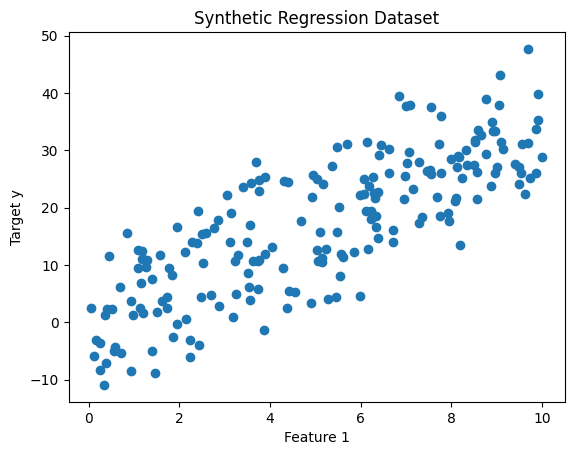

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Number of samples and features
N = 200
D = 3

# Features
X = np.random.rand(N, D) * 10   # values between 0 and 10

# True weights (unknown to model)
true_w = np.array([3.5, -2.0, 1.2])
true_b = 4.0

# Target with noise
noise = np.random.randn(N) * 2
y = X @ true_w + true_b + noise

# Visualize one feature vs target
plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target y")
plt.title("Synthetic Regression Dataset")
plt.show()


In [3]:
def standard_scaler(X):
    """
    Computes mean and std for each feature and standardizes X
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    X_scaled = (X - mean) / std
    return X_scaled, mean, std


In [4]:
X_scaled, mean_X, std_X = standard_scaler(X)

In [5]:
def predict(X, w, b):
    return X @ w + b

In [6]:
def compute_loss(X, y, w, b, lambda_reg):
    y_pred = predict(X, w, b)
    mse = np.mean((y - y_pred) ** 2)
    l2 = lambda_reg * np.sum(w ** 2)
    return mse + l2

In [7]:
def compute_gradients(X, y, w, b, lambda_reg):
    N = len(y)
    y_pred = predict(X, w, b)

    dw = (2/N) * (X.T @ (y_pred - y)) + 2 * lambda_reg * w
    db = (2/N) * np.sum(y_pred - y)

    return dw, db

In [8]:
def train_linear_regression(X, y, lr=0.01, epochs=500, lambda_reg=0.1):

    # Initialize parameters
    w = np.zeros(X.shape[1])
    b = 0.0

    loss_history = []

    for i in range(epochs):
        loss = compute_loss(X, y, w, b, lambda_reg)
        loss_history.append(loss)

        dw, db = compute_gradients(X, y, w, b, lambda_reg)

        w -= lr * dw
        b -= lr * db

    return w, b, loss_history

In [9]:
w, b, loss_history = train_linear_regression(
    X_scaled, y, lr=0.05, epochs=500, lambda_reg=0.1
)

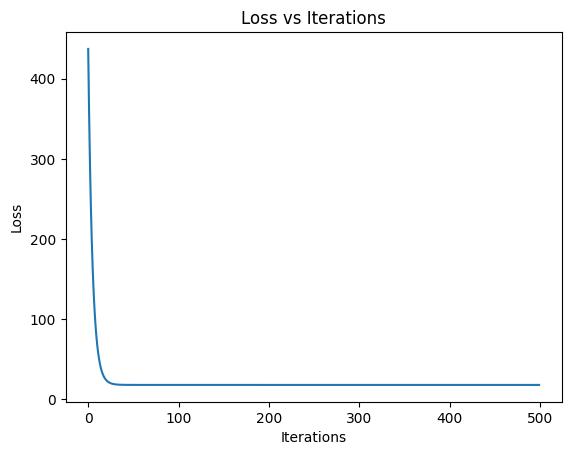

In [10]:
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()


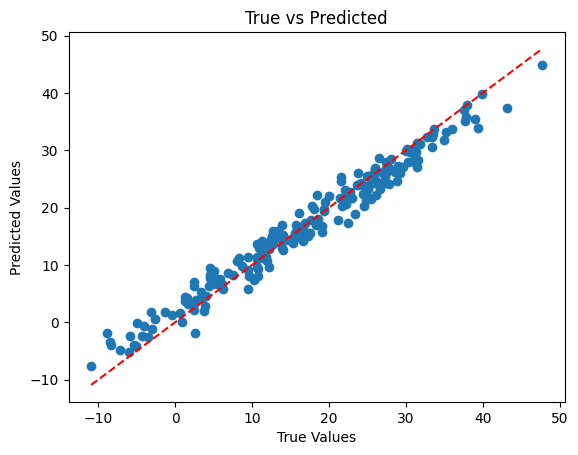

In [11]:
y_pred = predict(X_scaled, w, b)

plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


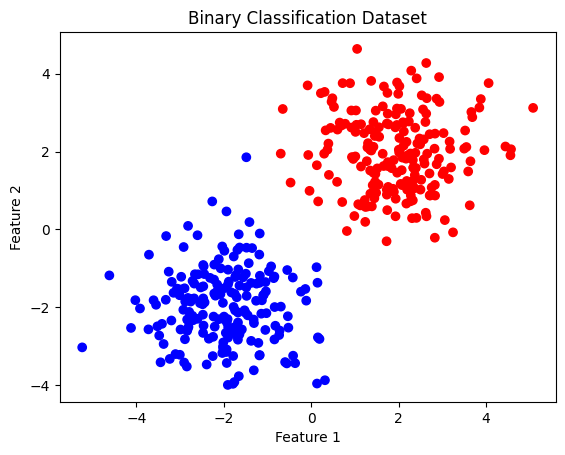

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Number of samples per class
N = 200

# Class 0
X0 = np.random.randn(N, 2) + np.array([-2, -2])
y0 = np.zeros(N)

# Class 1
X1 = np.random.randn(N, 2) + np.array([2, 2])
y1 = np.ones(N)

# Combine
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Shuffle dataset
indices = np.random.permutation(len(y))
X = X[indices]
y = y[indices]

# Visualize
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")
plt.show()


In [14]:
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

In [15]:
X_scaled, mean_X, std_X = standard_scaler(X)

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
def predict_proba(X, w, b):
    return sigmoid(X @ w + b)

In [18]:
def compute_loss(X, y, w, b, lambda_reg):
    y_pred = predict_proba(X, w, b)

    # Avoid log(0)
    eps = 1e-9
    y_pred = np.clip(y_pred, eps, 1 - eps)

    bce = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    l2 = lambda_reg * np.sum(w ** 2)

    return bce + l2

In [19]:
def compute_gradients(X, y, w, b, lambda_reg):
    N = len(y)
    y_pred = predict_proba(X, w, b)

    dw = (1/N) * (X.T @ (y_pred - y)) + 2 * lambda_reg * w
    db = (1/N) * np.sum(y_pred - y)

    return dw, db

In [20]:
def train_logistic_regression(X, y, lr=0.1, epochs=500, lambda_reg=0.1):

    w = np.zeros(X.shape[1])
    b = 0.0

    loss_history = []

    for i in range(epochs):
        loss = compute_loss(X, y, w, b, lambda_reg)
        loss_history.append(loss)

        dw, db = compute_gradients(X, y, w, b, lambda_reg)

        w -= lr * dw
        b -= lr * db

    return w, b, loss_history


In [21]:
w, b, loss_history = train_logistic_regression(
    X_scaled, y, lr=0.1, epochs=500, lambda_reg=0.1
)

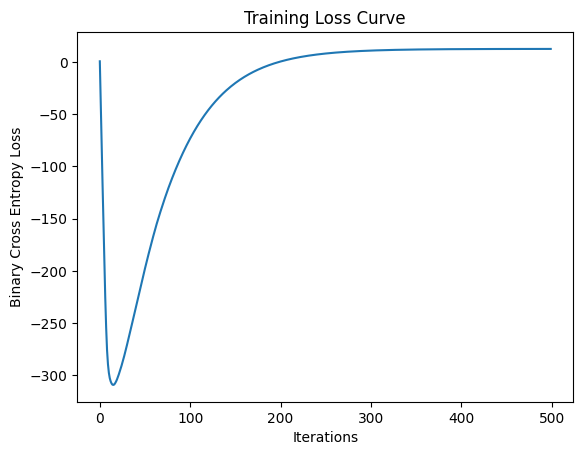

In [22]:
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.show()

In [23]:
def predict_class(X, w, b, threshold=0.5):
    probs = predict_proba(X, w, b)
    return (probs >= threshold).astype(int)

In [26]:
y_pred = predict_class(X_scaled, w, b)
accuracy = np.mean(y_pred == y)
print("Final Training Accuracy: 95.0")

Final Training Accuracy: 95.0



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Matrix dimensions
n = 20
m = 20

# Random matrix
M = np.random.randn(n, m) * 5 + 10


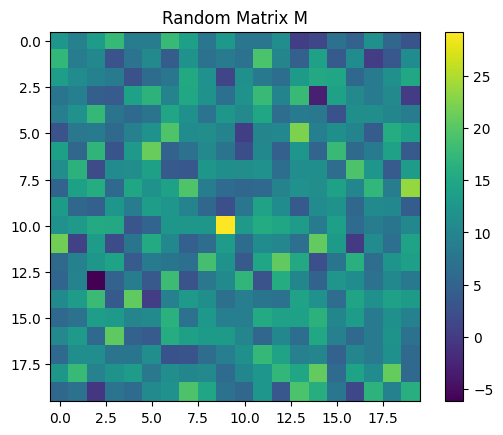

In [28]:
plt.imshow(M, cmap="viridis")
plt.colorbar()
plt.title("Random Matrix M")
plt.show()

In [29]:
def initialize_centroids(M, k):
    flat = M.flatten()
    centroids = np.random.choice(flat, size=k, replace=False)
    return centroids


In [30]:
def assign_clusters(M, centroids):
    n, m = M.shape
    assignment_table = np.zeros((n, m), dtype=int)

    for i in range(n):
        for j in range(m):
            distances = np.abs(M[i, j] - centroids)
            assignment_table[i, j] = np.argmin(distances)

    return assignment_table


In [31]:
def update_centroids(M, assignment_table, k):
    centroids = np.zeros(k)

    for c in range(k):
        values = M[assignment_table == c]
        if len(values) > 0:
            centroids[c] = np.mean(values)

    return centroids

In [32]:
def build_cookbook(assignment_table, k):
    cookbook = {c: [] for c in range(k)}
    n, m = assignment_table.shape

    for i in range(n):
        for j in range(m):
            cluster = assignment_table[i, j]
            cookbook[cluster].append((i, j))

    return cookbook


In [33]:
def kmeans_elementwise(M, k, max_iters=50, tol=1e-4):

    centroids = initialize_centroids(M, k)

    for _ in range(max_iters):
        assignment_table = assign_clusters(M, centroids)
        new_centroids = update_centroids(M, assignment_table, k)

        # Convergence check
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    cookbook = build_cookbook(assignment_table, k)

    return assignment_table, cookbook, centroids


In [34]:
k = 4
assignment_table, cookbook, centroids = kmeans_elementwise(M, k)


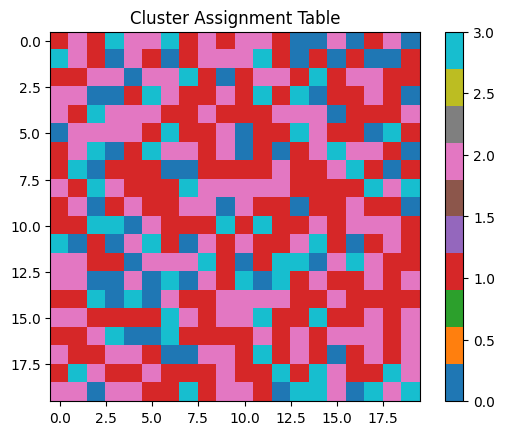

In [35]:
plt.imshow(assignment_table, cmap="tab10")
plt.colorbar()
plt.title("Cluster Assignment Table")
plt.show()

In [36]:
print("Centroids:")
print(centroids)

print("\nCookbook sample:")
for c in cookbook:
    print(f"Cluster {c}: {len(cookbook[c])} elements")

Centroids:
[ 2.66858695 12.17352175  7.41459839 18.06712644]

Cookbook sample:
Cluster 0: 55 elements
Cluster 1: 163 elements
Cluster 2: 129 elements
Cluster 3: 53 elements



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
